In [1]:
import numpy as np
import xobjects as xo
import xtrack as xt
import xpart as xp
import json
import pandas as pd
from cpymad.madx import Madx
from matplotlib import pyplot as plt
%matplotlib inline
import NAFFlib

In [2]:
ctx = xo.ContextCpu()

In [3]:
mad = Madx()
mad.call('/afs/cern.ch/user/a/afornara/simulations/2022_02_07/temp/lhcmask/python_examples/run3_collisions_python/andrea.madx')
mad.use(sequence="lhcb1")

In [4]:
#line.element_names
line = xt.Line.from_madx_sequence(mad.sequence['lhcb1'],
                                  deferred_expressions=True
                                  )

In [5]:
print(line.vars['i_mo']._get_value())
line.vars['i_mo'] = 0

-350.0


In [25]:

#Scorrere sugli ottupoli
sum_nl = 0.0
count_nl = 0
sum_sl = 0.0
count_sl = 0
for elem in line.element_dict :
    if isinstance(line.element_dict[elem],xt.beam_elements.elements.Multipole):   
        if(line.element_dict[elem].order==3):
                #i print sono giusti, li commento perché sono lunghi
                sum_nl+=line.element_dict[elem].knl[3]
                count_nl+=1
                sum_sl+=line.element_dict[elem].ksl
                count_sl+=1
                #print(elem)
                #print(line.element_dict[elem].knl)
                
        if(line.element_dict[elem].order==2):
                #i print sono giusti, li commento perché sono lunghi
                sum_nl+=line.element_dict[elem].knl[2]
                count_nl+=1
                #print(elem)
                #print(line.element_dict[elem].knl)
K_OCT = sum_nl/count_nl
K_OCT

-0.0026185068684590578

In [7]:
particles_3 = xp.Particles(_context=ctx,
                        p0c=7000e9,
                        x=[1.00951707e-08],px=[1.69518015e-10],
                        y=[5.65551848e-12],py=[6.07695199e-14]
                        )

In [16]:
tracker1 = xt.Tracker(_context=ctx, line=line)
tw1 = tracker1.twiss(particles_3)
tracker2 = xt.Tracker(_context=ctx, line=line)
tw2 = tracker2.twiss(particles_3)
tracker3 = xt.Tracker(_context=ctx, line=line)
tw3 = tracker3.twiss(particles_3)
tracker4 = xt.Tracker(_context=ctx, line=line)
tw4 = tracker4.twiss(particles_3)
tracker5 = xt.Tracker(_context=ctx, line=line)
tw5 = tracker5.twiss(particles_3)

generating ./e45673f9be9541eabe22d3ba5172adb0.c
the current directory is '/afs/cern.ch/user/a/afornara/simulations/2022_02_07/thick/postprocessing'
running build_ext
building 'e45673f9be9541eabe22d3ba5172adb0' extension
gcc -pthread -B /home/afornara/py/2022_03_02/miniconda/compiler_compat -Wno-unused-result -Wsign-compare -DNDEBUG -O2 -Wall -fPIC -O2 -isystem /home/afornara/py/2022_03_02/miniconda/include -I/home/afornara/py/2022_03_02/miniconda/include -fPIC -O2 -isystem /home/afornara/py/2022_03_02/miniconda/include -fPIC -I/home/afornara/py/2022_03_02/miniconda/include/python3.9 -c e45673f9be9541eabe22d3ba5172adb0.c -o ./e45673f9be9541eabe22d3ba5172adb0.o -std=c99 -O3 -Wno-unused-function
gcc -pthread -B /home/afornara/py/2022_03_02/miniconda/compiler_compat -shared -Wl,-rpath,/home/afornara/py/2022_03_02/miniconda/lib -Wl,-rpath-link,/home/afornara/py/2022_03_02/miniconda/lib -L/home/afornara/py/2022_03_02/miniconda/lib -L/home/afornara/py/2022_03_02/miniconda/lib -Wl,-rpath,/home

In [17]:
gamma=7000/.938
sigma_x=np.sqrt(120.29057045*3e-6/gamma)
sigma_x
n_turns = 1
N_arr=10000
#x_part0 = np.zeros(N_arr)
x_part1 = np.zeros(N_arr)
x_part2 = np.zeros(N_arr)
x_part3 = np.zeros(N_arr)
x_part4 = np.zeros(N_arr)
x_part5 = np.zeros(N_arr)

#co_part=tw['particle_on_co']
near_co_particle1=tw1['particle_on_co']
near_co_particle2=tw2['particle_on_co']
near_co_particle3=tw3['particle_on_co']
near_co_particle4=tw4['particle_on_co']
near_co_particle5=tw5['particle_on_co']


if False:
    for ii in range(N_arr):
        tracker.track(co_part, num_turns=n_turns,turn_by_turn_monitor=False)
        #print(particles_3.x)
        x_part0[ii]=co_part.x

positions = np.zeros(4)    
near_co_particle1.x=near_co_particle1.x+1e-5
near_co_particle2.x=near_co_particle2.x+1*sigma_x
near_co_particle3.x=near_co_particle3.x+2*sigma_x
near_co_particle4.x=near_co_particle4.x+3*sigma_x
near_co_particle5.x=near_co_particle5.x+4*sigma_x

positions[0]=near_co_particle2.x-near_co_particle1.x
positions[1]=near_co_particle3.x-near_co_particle1.x
positions[2]=near_co_particle4.x-near_co_particle1.x
positions[3]=near_co_particle5.x-near_co_particle1.x

if False:
    for ii in range(N_arr):
        tracker1.track(near_co_particle1, num_turns=n_turns,turn_by_turn_monitor=False)
        x_part1[ii]=near_co_particle1.x
        #print(x_part1[ii])
for ii in range(N_arr):
    tracker2.track(near_co_particle2, num_turns=n_turns,turn_by_turn_monitor=False)
    x_part2[ii]=near_co_particle2.x
    #print(x_part2[ii])
for ii in range(N_arr):
    tracker3.track(near_co_particle3, num_turns=n_turns,turn_by_turn_monitor=False)
    x_part3[ii]=near_co_particle3.x
    #print(x_part3[ii])
for ii in range(N_arr):
    tracker4.track(near_co_particle4, num_turns=n_turns,turn_by_turn_monitor=False)
    x_part4[ii]=near_co_particle4.x
for ii in range(N_arr):
    tracker5.track(near_co_particle5, num_turns=n_turns,turn_by_turn_monitor=False)
    x_part5[ii]=near_co_particle5.x
    #print(x_part5[ii])
    
#print(x_part1[ii])

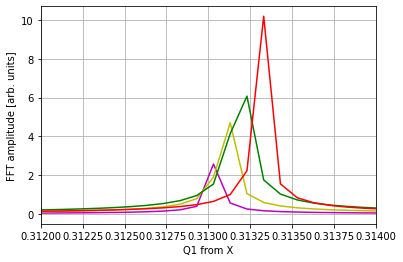

In [26]:
#Max_reco_freq= sampling frequency/2.
plt.figure()
#plt.plot(np.linspace(0,1,len(x_part0)), np.abs(np.fft.fft(x_part0)), 'b')
#plt.plot(np.linspace(0,1,len(x_part1)), np.abs(np.fft.fft(x_part1)), 'c')
plt.plot(np.linspace(0,1,len(x_part2)), np.abs(np.fft.fft(x_part2)), 'm')
plt.plot(np.linspace(0,1,len(x_part3)), np.abs(np.fft.fft(x_part3)), 'y')
plt.plot(np.linspace(0,1,len(x_part4)), np.abs(np.fft.fft(x_part4)), 'g')
plt.plot(np.linspace(0,1,len(x_part5)), np.abs(np.fft.fft(x_part5)), 'r')
plt.xlabel('Q1 from X')
plt.ylabel('FFT amplitude [arb. units]')
plt.xlim(0.312,0.314)
plt.grid()
#print(np.abs(np.fft.fft(x_part)))

In [19]:
#q0 = NAFFlib.get_tune(x_part0)
q1 = NAFFlib.get_tune(x_part1)
q2 = NAFFlib.get_tune(x_part2)
q3 = NAFFlib.get_tune(x_part3)
q4 = NAFFlib.get_tune(x_part4)
q5 = NAFFlib.get_tune(x_part5)
print('q1 =',q1,'q2 =', q2, ', q3 =', q3, ', q4 =', q4,', q5 =', q5)
tunes = np.zeros(4)
#tunes[0]=q0
#tunes[0]=q1
tunes[0]=q2
tunes[1]=q3
tunes[2]=q4
tunes[3]=q5
#positions[0]=x_part0[0] 
#positions[0]=near_co_particle1.x+0.2*sigma_x

#print(positions[1],tunes[1])

q1 = -9.999555550706897e-05 q2 = 0.31301791599918444 , q3 = 0.3130712654474325 , q4 = 0.3131594674222655 , q5 = 0.3132820872098347


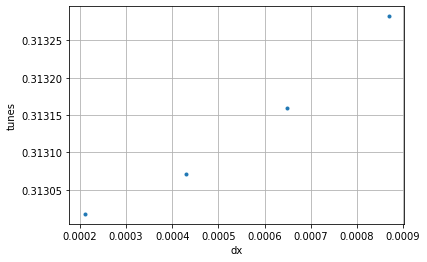

In [20]:
plt.plot(positions,tunes,'.')
plt.grid()
plt.xlabel('dx')
plt.ylabel('tunes');
#plt.ylim(0.312,0.315)